In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import constants as cs
#I am here

### Test max,min, suntax

In [ ]:
parking = {
    'P1':1,
    'P2':4,
    'P3':1,
    'P4':2
}

print(max(parking, key=parking.get))

parking['P3'] += 5

print(max(parking, key=parking.get))

P2
P3


# Test Order Data

In [ ]:
fp = 'strategies/final-project-2022m4_orders.csv'
df = pd.read_csv(fp)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962819 entries, 0 to 962818
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   OrderTimeInSec  962819 non-null  int64
 1   QtyShirt        962819 non-null  int64
 2   QtyHoodie       962819 non-null  int64
 3   QtySweatpants   962819 non-null  int64
 4   QtySneakers     962819 non-null  int64
dtypes: int64(5)
memory usage: 36.7 MB


In [ ]:
order_sample = df.iloc[:100, :]
order_sample.to_csv('strategies/order_sample.csv')
order_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   OrderTimeInSec  100 non-null    int64
 1   QtyShirt        100 non-null    int64
 2   QtyHoodie       100 non-null    int64
 3   QtySweatpants   100 non-null    int64
 4   QtySneakers     100 non-null    int64
dtypes: int64(5)
memory usage: 4.0 KB


In [ ]:
_deepnote_run_altair(df, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"line","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"OrderTimeInSec","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"QtyHoodie","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

# Generate Daily/Weekly delivery times

In [ ]:
weekly_delivery_times = []
daily_delivery_times = []

week = 604800
day = 86400
hour = 3600
minute = 60

daily_first = (3600)*9
Mon_first = 345600 + (3600)*9
for i in range (31536000): 
    if (i - daily_first) % day == 0:
        daily_delivery_times.append(i)
    if (i - Mon_first) % week == 0:
        weekly_delivery_times.append(i)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

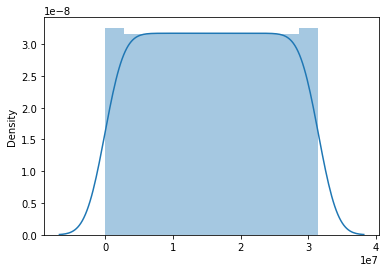

In [ ]:
for i in range(365): 
    midnights.append(i*86400)

sns.distplot(midnights)

# Parse Shifts

In [ ]:
hour = 60 * 60

day = hour * 24
week = day * 7

def get_day_and_shift(timestamp):
    curr_time = timestamp % day
    curr_day = timestamp % week

    # Calculate SHIFT [0,1,2]
    if curr_time <= (hour * 8): #First 8 hours
        shift = 0
    elif curr_time <= (hour * 16 ):
        shift = 1
    else:  # shift < hour * 24 = 86400 = week
        shift = 2

    # Calculate DAY of WEEK
    days = ["THU", "FRI", "SAT", "SUN", "MON", "TUE", "WED"]
    for i in range(1,8):
        if curr_day < day*i:  #<12 AM
            today = days[i-1]
            break
    
    print("{}: {} shift {}".format(timestamp, today, shift))
    return (today, shift)

for i in range (week*2):
    if i % hour == 0:
        get_day_and_shift(i)

0: THU shift 0
3600: THU shift 0
7200: THU shift 0
10800: THU shift 0
14400: THU shift 0
18000: THU shift 0
21600: THU shift 0
25200: THU shift 0
28800: THU shift 0
32400: THU shift 1
36000: THU shift 1
39600: THU shift 1
43200: THU shift 1
46800: THU shift 1
50400: THU shift 1
54000: THU shift 1
57600: THU shift 1
61200: THU shift 2
64800: THU shift 2
68400: THU shift 2
72000: THU shift 2
75600: THU shift 2
79200: THU shift 2
82800: THU shift 2
86400: FRI shift 0
90000: FRI shift 0
93600: FRI shift 0
97200: FRI shift 0
100800: FRI shift 0
104400: FRI shift 0
108000: FRI shift 0
111600: FRI shift 0
115200: FRI shift 0
118800: FRI shift 1
122400: FRI shift 1
126000: FRI shift 1
129600: FRI shift 1
133200: FRI shift 1
136800: FRI shift 1
140400: FRI shift 1
144000: FRI shift 1
147600: FRI shift 2
151200: FRI shift 2
154800: FRI shift 2
158400: FRI shift 2
162000: FRI shift 2
165600: FRI shift 2
169200: FRI shift 2
172800: SAT shift 0
176400: SAT shift 0
180000: SAT shift 0
183600: SAT sh

In [ ]:
weekly_df = pd.DataFrame(weekly_delivery_times, columns=['Timestamp'])
weekly_df['P1'] = 400
weekly_df['P2'] = 600
weekly_df['P3'] = 500
weekly_df['P4'] = 300
weekly_df.reset_index(drop=True)
weekly_df.to_csv('strategies/weekly_delivery.csv')


,Timestamp,P1,P2,P3,P4
0,378000,400,600,500,300
1,982800,400,600,500,300
2,1587600,400,600,500,300
3,2192400,400,600,500,300
4,2797200,400,600,500,300
5,3402000,400,600,500,300
6,4006800,400,600,500,300
7,4611600,400,600,500,300
8,5216400,400,600,500,300
9,5821200,400,600,500,300


In [ ]:
daily_df = pd.DataFrame(daily_delivery_times, columns=['Timestamp'])
daily_df['P1'] = 40
daily_df['P2'] = 60
daily_df['P3'] = 50
daily_df['P4'] = 30
daily_df.reset_index(drop=True)
daily_df.to_csv('strategies/daily_delivery.csv')


In [ ]:
daily_df

,Timestamp,P1,P2,P3,P4
0,32400,40,60,50,30
1,118800,40,60,50,30
2,205200,40,60,50,30
3,291600,40,60,50,30
4,378000,40,60,50,30
...,...,...,...,...,...
360,31136400,40,60,50,30
361,31222800,40,60,50,30
362,31309200,40,60,50,30
363,31395600,40,60,50,30


# Read Sim Output

,time,parking_p1,parking_p2,parking_p3,parking_p4,storage_a1_p1,storage_a1_p2,storage_a1_p3,storage_a1_p4,storage_a2_p1,...,temp_packing_p2,temp_packing_p3,temp_packing_p4,costs_labor,costs_delivery,costs_lost_sales,costs_facilities_fxd,costs_packing_stn,costs_inventory_hldg,revenue
count,3.174700e+05,317470.000000,317470.000000,317470.000000,317470.000000,317470.000000,317470.0,317470.0,317470.0,317470.0,...,317470.000000,317470.000000,317470.000000,317470.000000,317470.000000,317470.0,317470.0,317470.0,317470.0,317470.000000
mean,1.295932e+06,5944.731020,5185.702737,4975.912149,3524.306546,17771.328100,0.0,0.0,0.0,0.0,...,3540.357335,3569.452484,1967.510303,72133.699698,29839.858884,0.0,0.0,0.0,0.0,127939.710940
std,7.487871e+05,4396.066082,5007.182010,4622.849512,3483.606596,7844.489107,0.0,0.0,0.0,0.0,...,2066.824948,2064.380373,1137.390907,42136.467186,12905.620046,0.0,0.0,0.0,0.0,78436.572975
min,0.000000e+00,-4.000000,0.000000,0.000000,1.000000,6670.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,10000.000000,0.0,0.0,0.0,0.0,0.000000
25%,6.670657e+05,1.000000,0.000000,0.000000,1.000000,9538.000000,0.0,0.0,0.0,0.0,...,1791.000000,1805.000000,1005.000000,37274.000000,20000.000000,0.0,0.0,0.0,0.0,61814.000000
50%,1.320715e+06,7584.000000,3797.000000,3802.000000,2527.000000,15663.000000,0.0,0.0,0.0,0.0,...,3581.000000,3658.000000,2006.000000,72927.000000,30000.000000,0.0,0.0,0.0,0.0,129532.000000
75%,1.959720e+06,10153.000000,9102.000000,9107.000000,6072.000000,23527.000000,0.0,0.0,0.0,0.0,...,5393.000000,5412.000000,2968.000000,110202.000000,40000.000000,0.0,0.0,0.0,0.0,196936.000000
max,2.592000e+06,10156.000000,15234.000000,12695.000000,12696.000000,31791.000000,0.0,0.0,0.0,0.0,...,7112.000000,7114.000000,3934.000000,144242.000000,50000.000000,0.0,0.0,0.0,0.0,262554.000000


Text(0.5, 1.0, 'costs_inventory_hldg')

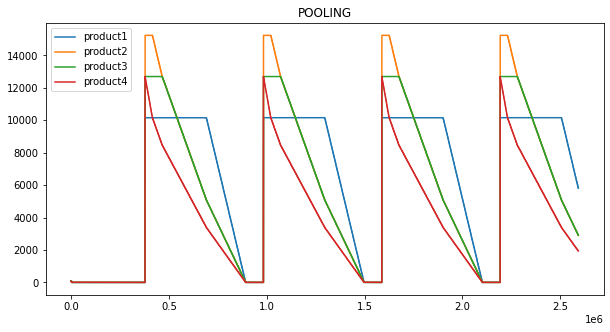

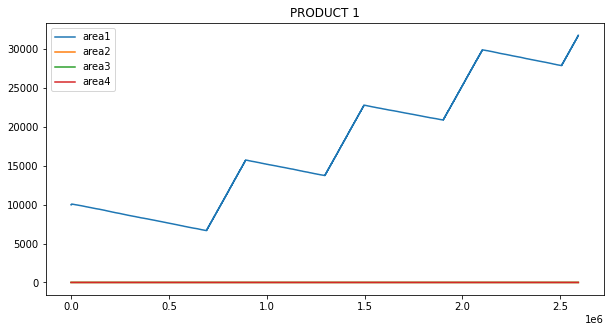

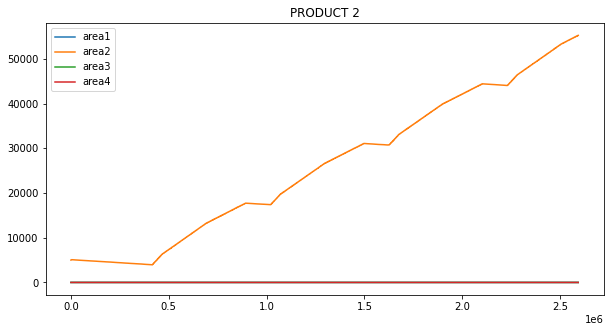

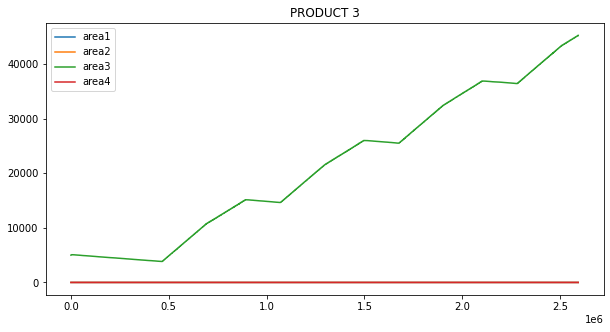

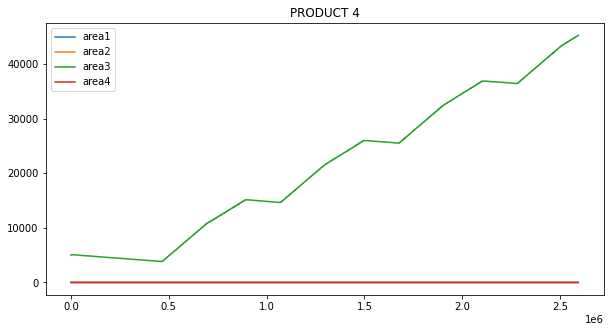

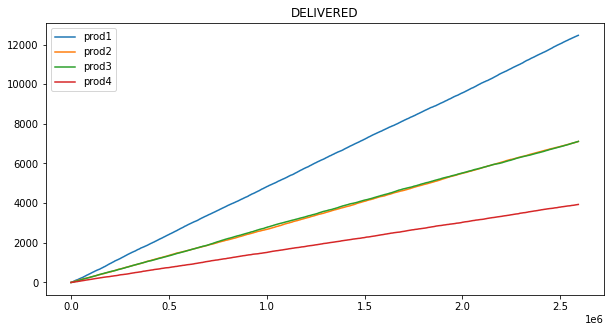

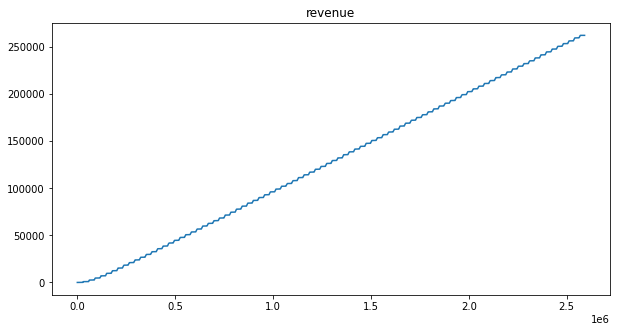

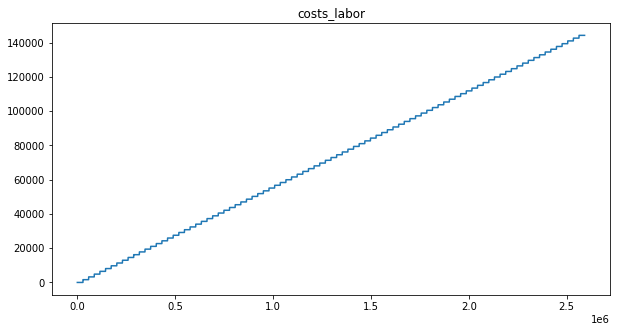

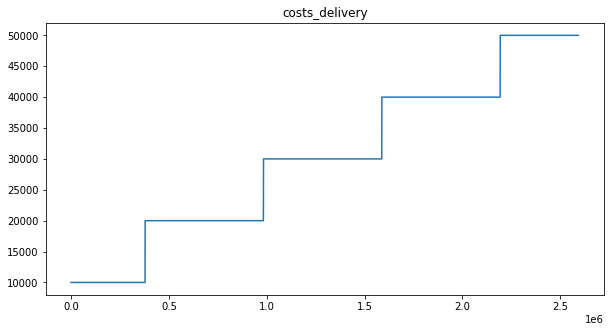

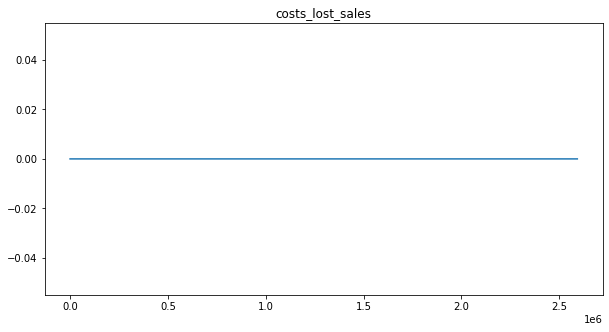

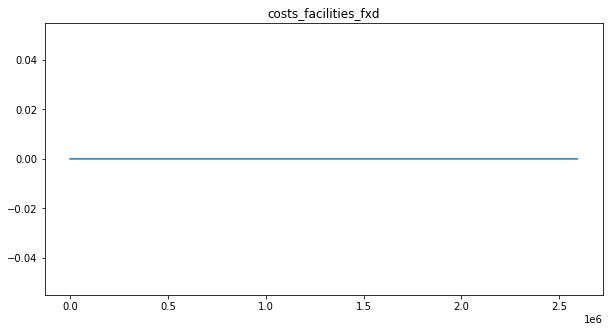

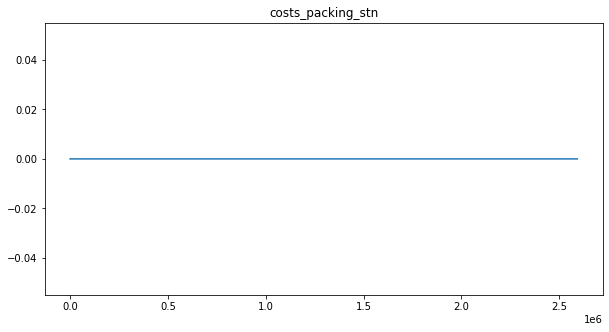

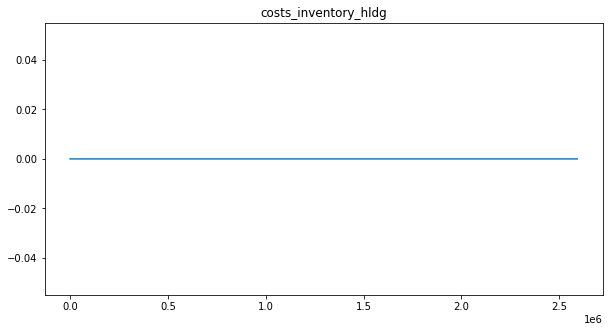

In [ ]:
df = pd.read_csv('/work/output/simout_05_03-19:22.csv')
df=df.rename(columns={'Unnamed: 0':'time'})

display(df.describe())

plt.figure(figsize=(10,5))
plt.plot(df['time'], df['parking_p1'], label='product1')
plt.plot(df['time'], df['parking_p2'], label='product2')
plt.plot(df['time'], df['parking_p3'], label='product3')
plt.plot(df['time'], df['parking_p4'], label='product4')
plt.legend()
plt.title('POOLING')


plt.figure(figsize=(10,5))
plt.plot(df['time'], df['storage_a1_p1'], label='area1')
plt.plot(df['time'], df['storage_a2_p1'], label='area2')
plt.plot(df['time'], df['storage_a3_p1'], label='area3')
plt.plot(df['time'], df['storage_a4_p1'], label='area4')
plt.legend()
plt.title('PRODUCT 1')


plt.figure(figsize=(10,5))
plt.plot(df['time'], df['storage_a1_p2'], label='area1')
plt.plot(df['time'], df['storage_a2_p2'], label='area2')
plt.plot(df['time'], df['storage_a3_p2'], label='area3')
plt.plot(df['time'], df['storage_a4_p2'], label='area4')
plt.legend()
plt.title('PRODUCT 2')

plt.figure(figsize=(10,5))
plt.plot(df['time'], df['storage_a1_p3'], label='area1')
plt.plot(df['time'], df['storage_a2_p3'], label='area2')
plt.plot(df['time'], df['storage_a3_p3'], label='area3')
plt.plot(df['time'], df['storage_a4_p3'], label='area4')
plt.legend()
plt.title('PRODUCT 3')

plt.figure(figsize=(10,5))
plt.plot(df['time'], df['storage_a1_p3'], label='area1')
plt.plot(df['time'], df['storage_a2_p3'], label='area2')
plt.plot(df['time'], df['storage_a3_p3'], label='area3')
plt.plot(df['time'], df['storage_a4_p3'], label='area4')
plt.legend()
plt.title('PRODUCT 4')

plt.figure(figsize=(10,5))
plt.plot(df['time'], df['temp_packing_p1'], label='prod1')
plt.plot(df['time'], df['temp_packing_p2'], label='prod2')
plt.plot(df['time'], df['temp_packing_p3'], label='prod3')
plt.plot(df['time'], df['temp_packing_p4'], label='prod4')
plt.legend()
plt.title('DELIVERED')

plt.figure(figsize=(10,5))
plt.plot(df['time'], df['revenue'], label='revenue')
plt.title('revenue')

plt.figure(figsize=(10,5))
plt.plot(df['time'], df['costs_labor'], label='costs_labor')
plt.title('costs_labor')

plt.figure(figsize=(10,5))
plt.plot(df['time'], df['costs_delivery'], label='costs_delivery')
plt.title('costs_delivery')

plt.figure(figsize=(10,5))
plt.plot(df['time'], df['costs_lost_sales'], label='costs_lost_sales')
plt.title('costs_lost_sales')

plt.figure(figsize=(10,5))
plt.plot(df['time'], df['costs_facilities_fxd'], label='costs_facilities_fxd')
plt.title('costs_facilities_fxd')

plt.figure(figsize=(10,5))
plt.plot(df['time'], df['costs_packing_stn'], label='costs_packing_stn')
plt.title('costs_packing_stn')

plt.figure(figsize=(10,5))
plt.plot(df['time'], df['costs_inventory_hldg'], label='costs_inventory_hldg')
plt.title('costs_inventory_hldg')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=49b2f27e-3adc-4149-b31f-ff16a80fd77c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>